## Analisi dati covid19 delle provincie italiane

i dati grezzi sono scaricati dai seguenti repository:
* dati aggiornati sull'infezione dal repository della protezione civile: https://github.com/pcm-dpc/COVID-19
* dati geografici sui confini amministrativi dal repository di openpolis: https://github.com/openpolis

### importazione dei dati sull'infezione in un dataframe pandas

In [1]:
import pandas
from datetime import datetime, timedelta

cv_df = pandas.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv",parse_dates=['data'])
latest = cv_df['data'].max()
first = cv_df['data'].min()
before_latest = latest - timedelta(days=1)
print (first,latest,before_latest)
cv_df

2020-02-24 18:00:00 2021-02-22 17:00:00 2021-02-21 17:00:00


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN,NaN,NaN
1,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN,NaN,NaN
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN,NaN,NaN
3,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN,NaN,NaN
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51818,2021-02-22 17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,52639,NaN,ITH,ITH3,ITH35
51819,2021-02-22 17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,60833,NaN,ITH,ITH3,ITH36
51820,2021-02-22 17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,10310,NaN,ITH,ITH3,ITH37
51821,2021-02-22 17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,4379,NaN,ITH,ITH3,NaN


### Filtro dei risultati per campo regione e per l'ultimo giorno di aggiornamento

In [2]:
from datetime import datetime
regione = "Piemonte"
cv_df_target = cv_df.loc[cv_df["data"]==latest]
cv_df_target = cv_df_target.loc[cv_df_target["denominazione_regione"] == regione]
cv_df_target.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
51759,2021-02-22 17:00:00,ITA,1,Piemonte,1,Torino,TO,45.073274,7.680687,126598,NaN,ITC,ITC1,ITC11
51760,2021-02-22 17:00:00,ITA,1,Piemonte,2,Vercelli,VC,45.323981,8.423234,8810,NaN,ITC,ITC1,ITC12
51761,2021-02-22 17:00:00,ITA,1,Piemonte,3,Novara,NO,45.445885,8.621916,18676,NaN,ITC,ITC1,ITC15
51762,2021-02-22 17:00:00,ITA,1,Piemonte,4,Cuneo,CN,44.393296,7.551172,32341,NaN,ITC,ITC1,ITC16
51763,2021-02-22 17:00:00,ITA,1,Piemonte,5,Asti,AT,44.899129,8.204143,12264,NaN,ITC,ITC1,ITC17


### Generazione di un grafico a barre dei dati aggiornati

Text(0.5, 1.0, '2021-02-22 17:00:00 - casi in terapia')

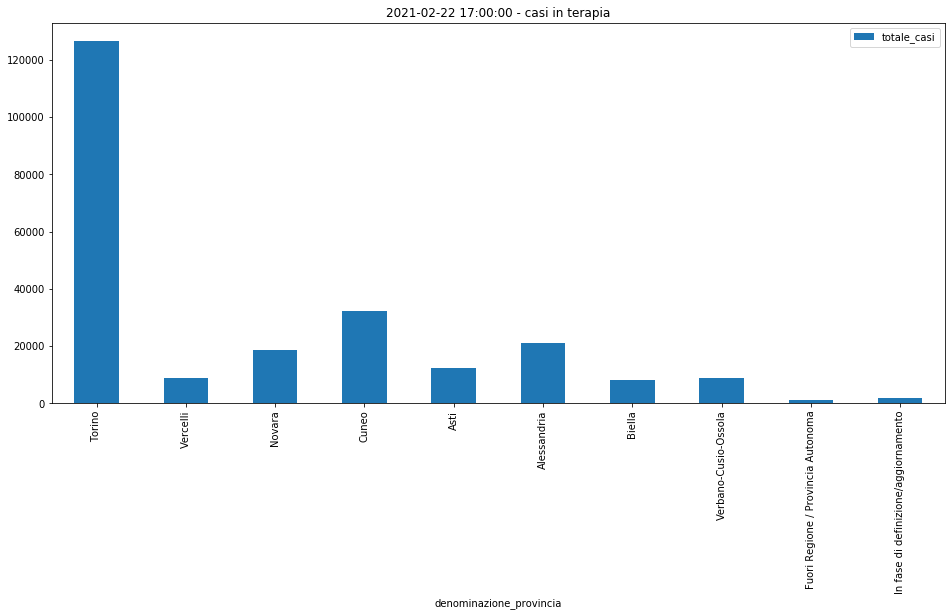

In [9]:
import matplotlib

ax = cv_df_target.plot.bar(x='denominazione_provincia', y='totale_casi', figsize=(16, 7))
ax.set_title(str(latest) + ' - casi in terapia')

### Importazione dei limiti amministrativi delle provincie italiane in un dataframe geopandas

In [10]:
import geopandas

geo_df = geopandas.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_provinces.geojson")
geo_df.crs = "EPSG:4326"
geo_df.head()

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ..."
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ..."
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ..."
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4..."
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ..."


### Merge dei dati precedentemente processati

In [11]:
cv_df_geo = geo_df.merge(cv_df_target, left_on='prov_acr', right_on='sigla_provincia')
cv_df_geo.head()

,prov_name,prov_istat_code_num,prov_acr,reg_name,reg_istat_code,reg_istat_code_num,prov_istat_code,geometry,data,stato,...,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,Torino,1,TO,Piemonte,01,1,001,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",2021-02-22 17:00:00,ITA,...,1,Torino,TO,45.073274,7.680687,126598,NaN,ITC,ITC1,ITC11
1,Vercelli,2,VC,Piemonte,01,1,002,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",2021-02-22 17:00:00,ITA,...,2,Vercelli,VC,45.323981,8.423234,8810,NaN,ITC,ITC1,ITC12
2,Novara,3,NO,Piemonte,01,1,003,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",2021-02-22 17:00:00,ITA,...,3,Novara,NO,45.445885,8.621916,18676,NaN,ITC,ITC1,ITC15
3,Cuneo,4,CN,Piemonte,01,1,004,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",2021-02-22 17:00:00,ITA,...,4,Cuneo,CN,44.393296,7.551172,32341,NaN,ITC,ITC1,ITC16
4,Asti,5,AT,Piemonte,01,1,005,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",2021-02-22 17:00:00,ITA,...,5,Asti,AT,44.899129,8.204143,12264,NaN,ITC,ITC1,ITC17


## Visualizzazione di una carta tematica

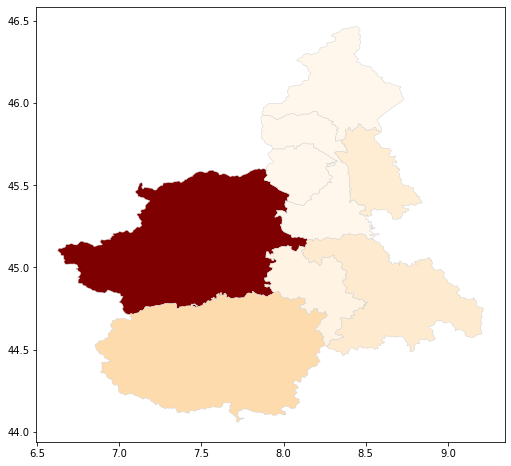

In [6]:
import descartes

cv_df_geo.plot(column="totale_casi", cmap='OrRd', edgecolor = "lightgrey", linewidth = 0.5, figsize=(18, 8))


## Generazione di un grafico della progressione temportale dei casi

In [12]:
cv_pro1 = "Roma"
cv_df_progress1 = cv_df.loc[cv_df["denominazione_provincia"]==cv_pro1]

cv_pro2 = "Padova"
cv_df_progress2 = cv_df.loc[cv_df["denominazione_provincia"]==cv_pro2]
cv_df_progress2.head()


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
125,2020-02-24 18:00:00,ITA,5,Veneto,28,Padova,PD,45.40693,11.876087,0,NaN,NaN,NaN,NaN
253,2020-02-25 18:00:00,ITA,5,Veneto,28,Padova,PD,45.40693,11.876087,30,NaN,NaN,NaN,NaN
381,2020-02-26 18:00:00,ITA,5,Veneto,28,Padova,PD,45.40693,11.876087,40,NaN,NaN,NaN,NaN
509,2020-02-27 18:00:00,ITA,5,Veneto,28,Padova,PD,45.40693,11.876087,59,NaN,NaN,NaN,NaN
637,2020-02-28 18:00:00,ITA,5,Veneto,28,Padova,PD,45.40693,11.876087,68,NaN,NaN,NaN,NaN


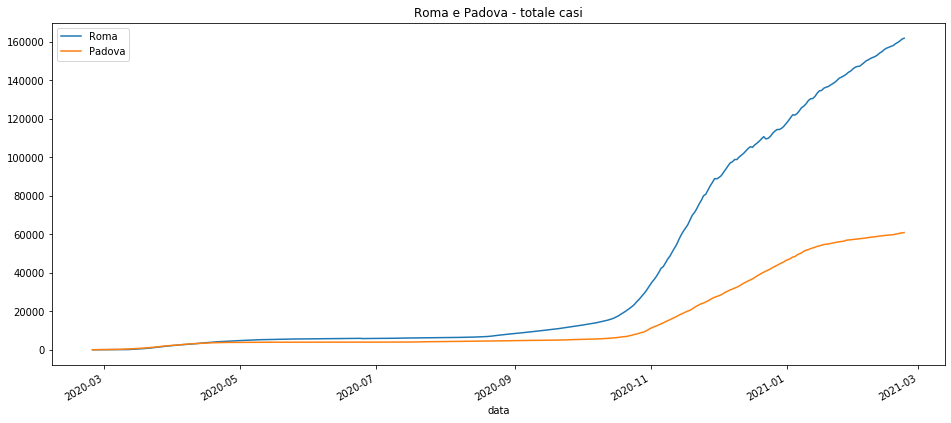

In [8]:
ax = cv_df_progress1.plot(x='data', y='totale_casi', figsize=(16, 7))
ax = cv_df_progress2.plot(ax = ax, x='data', y='totale_casi', figsize=(16, 7))
ax.set_title('%s e %s - totale casi' % (cv_pro1,cv_pro2))
ax.legend((cv_pro1, cv_pro2))